In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import scipy.stats as stats
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# import the chicago data file
city_data = pd.read_csv('Data/chicago_data.csv')
roll_avg = pd.read_csv('Data/rolling_AVG.csv')
city_data

,date,date_formatted,month,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,...,people_not_positive_age_unknown,people_not_positive_female,people_not_positive_male,people_not_positive_gender_unknown,people_not_positive_latinx,people_not_positive_asian_non_latinx,people_not_positive_black_non_latinx,people_not_positive_white_non_latinx,people_not_positive_other_race_non_latinx,people_not_positive_unknown_race_ethnicity
0,2020-03-09T00:00:00.000,3/9/2020,3,5,0,3,3,0,0,0,...,0,35,22,2,7,3,8,13,5,23
1,2020-03-10T00:00:00.000,3/10/2020,3,11,0,8,1,2,3,2,...,1,30,29,2,10,2,6,16,3,24
2,2020-03-11T00:00:00.000,3/11/2020,3,12,0,9,0,3,1,3,...,1,32,10,5,8,1,3,9,3,23
3,2020-03-12T00:00:00.000,3/12/2020,3,21,0,8,0,6,5,2,...,6,36,33,2,6,0,7,10,4,44
4,2020-03-13T00:00:00.000,3/13/2020,3,32,0,12,0,4,13,5,...,0,45,46,18,8,4,4,12,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-10-18T00:00:00.000,10/18/2020,10,314,0,23,24,76,78,57,...,2,1011,974,8,223,53,253,514,82,868
224,2020-10-19T00:00:00.000,10/19/2020,10,1115,2,22,144,262,235,160,...,1,2756,2507,156,1041,176,807,1234,197,1964
225,2020-10-20T00:00:00.000,10/20/2020,10,1098,3,21,148,279,211,182,...,3,2773,2446,60,922,188,724,1237,184,2024
226,2020-10-21T00:00:00.000,10/21/2020,10,949,4,15,90,292,199,143,...,1,2880,2443,49,919,197,794,1349,197,1916


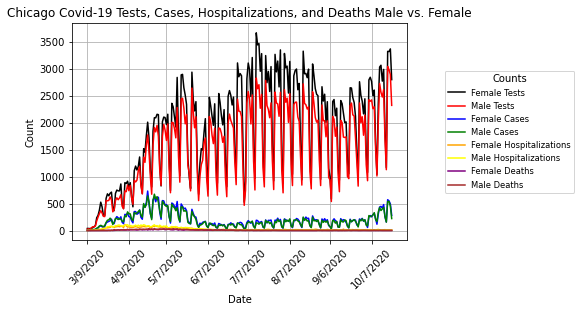

In [2]:
# Generate a plot Chicago COVID 19 Daily Tests, Positive Cases, Hospitalizations, and Deaths (Male vs. Female)
plt.plot(city_data['date_formatted'], city_data['people_tested_female'], c='black', label = 'Female Tests')
plt.plot(city_data['date_formatted'], city_data['people_tested_male'], c='r', label = 'Male Tests')
plt.plot(city_data['date_formatted'], city_data['cases_female'], c='b', label = 'Female Cases')
plt.plot(city_data['date_formatted'], city_data['cases_male'], c='g', label = 'Male Cases')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_female'], c='orange', label = 'Female Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_male'], c='yellow', label = 'Male Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['deaths_female'], c='purple', label = 'Female Deaths')
plt.plot(city_data['date_formatted'], city_data['deaths_male'], c='brown', label = 'Male Deaths')
plt.title("Chicago Covid-19 Tests, Cases, Hospitalizations, and Deaths Male vs. Female")
plt.xlabel("Date")
plt.ylabel("Count")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Counts')
plt.grid()
plt.show()

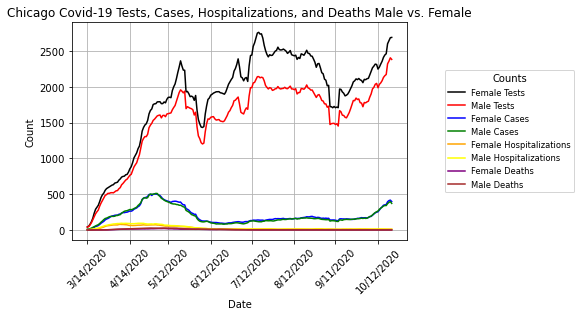

In [3]:
# Generate a plot of the 7-day rolling average of Chicago COVID 19 Daily Tests, Positive Cases, Hospitalizations, and Deaths (Male vs. Female)
plt.plot(roll_avg['date_formatted'], roll_avg['people_tested_female'], c='black', label = 'Female Tests')
plt.plot(roll_avg['date_formatted'], roll_avg['people_tested_male'], c='red', label = 'Male Tests')
plt.plot(roll_avg['date_formatted'], roll_avg['cases_female'], c='b', label = 'Female Cases')
plt.plot(roll_avg['date_formatted'], roll_avg['cases_male'], c='g', label = 'Male Cases')
plt.plot(roll_avg['date_formatted'], roll_avg['hospitalizations_female'], c='orange', label = 'Female Hospitalizations')
plt.plot(roll_avg['date_formatted'], roll_avg['hospitalizations_male'], c='yellow', label = 'Male Hospitalizations')
plt.plot(roll_avg['date_formatted'], roll_avg['deaths_female'], c='purple', label = 'Female Deaths')
plt.plot(roll_avg['date_formatted'], roll_avg['deaths_male'], c='brown', label = 'Male Deaths')
plt.title("Chicago Covid-19 Tests, Cases, Hospitalizations, and Deaths Male vs. Female")
plt.xlabel("Date")
plt.ylabel("Count")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Counts')
plt.grid()
plt.show()

In [4]:
# Generate a new DataFrame from the rolling average data and calculate the Positivity, Hospitalization, and Case Mortality Rates (Male vs. Female) for plotting
f_m_df = pd.DataFrame(roll_avg[['date_formatted','day','month','cases_female','cases_male','people_tested_female','people_tested_male','hospitalizations_female','hospitalizations_male','deaths_female','deaths_male']])
f_m_df['Pos Rate_female'] = f_m_df['cases_female']/f_m_df['people_tested_female']*100
f_m_df['Pos Rate_male'] = f_m_df['cases_male']/f_m_df['people_tested_male']*100
f_m_df['Hosp Rate_female'] = f_m_df['hospitalizations_female']/f_m_df['cases_female']*100
f_m_df['Hosp Rate_male'] = f_m_df['hospitalizations_male']/f_m_df['cases_male']*100
f_m_df['Case Mortality_female'] = f_m_df['deaths_female']/f_m_df['cases_female']*100
f_m_df['Case Mortality_male'] = f_m_df['deaths_male']/f_m_df['cases_male']*100
f_m_df

,date_formatted,day,month,cases_female,cases_male,people_tested_female,people_tested_male,hospitalizations_female,hospitalizations_male,deaths_female,deaths_male,Pos Rate_female,Pos Rate_male,Hosp Rate_female,Hosp Rate_male,Case Mortality_female,Case Mortality_male
0,3/14/2020,Saturday,3,6.571429,9.571429,42.285714,40.428571,4.285714,4.285714,0.000000,0.000000,15.540541,23.674912,65.217391,44.776119,0.000000,0.000000
1,3/15/2020,Sunday,3,8.285714,13.142857,52.714286,49.000000,5.142857,5.571429,0.000000,0.000000,15.718157,26.822157,62.068966,42.391304,0.000000,0.000000
2,3/16/2020,Monday,3,13.142857,18.714286,81.142857,71.142857,5.571429,7.142857,0.142857,0.000000,16.197183,26.305221,42.391304,38.167939,1.086957,0.000000
3,3/17/2020,Tuesday,3,17.285714,26.571429,116.000000,102.285714,6.142857,9.571429,0.142857,0.142857,14.901478,25.977654,35.537190,36.021505,0.826446,0.537634
4,3/18/2020,Wednesday,3,28.285714,37.000000,165.142857,144.428571,7.285714,12.857143,0.285714,0.142857,17.128028,25.618200,25.757576,34.749035,1.010101,0.386100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10/18/2020,Sunday,10,356.714286,341.285714,2464.285714,2174.285714,12.000000,11.285714,1.142857,1.285714,14.475362,15.696452,3.364037,3.306823,0.320384,0.376727
219,10/19/2020,Monday,10,394.857143,369.428571,2604.142857,2323.571429,11.857143,9.571429,0.857143,1.428571,15.162653,15.899170,3.002894,2.590874,0.217077,0.386698
220,10/20/2020,Tuesday,10,411.142857,385.714286,2645.142857,2360.142857,11.285714,9.285714,0.857143,1.285714,15.543314,16.342836,2.744962,2.407407,0.208478,0.333333
221,10/21/2020,Wednesday,10,417.714286,397.714286,2688.571429,2407.285714,11.428571,8.571429,0.857143,1.428571,15.536663,16.521275,2.735978,2.155172,0.205198,0.359195


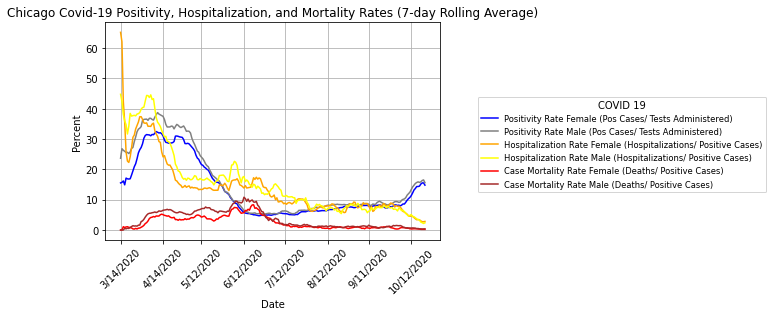

In [5]:
# Plot the Positivity, Hospitalization, and Case Mortality Rates
plt.plot(f_m_df['date_formatted'], f_m_df['Pos Rate_female'], c='b', label = 'Positivity Rate Female (Pos Cases/ Tests Administered)')
plt.plot(f_m_df['date_formatted'], f_m_df['Pos Rate_male'], c='gray', label = 'Positivity Rate Male (Pos Cases/ Tests Administered)')
plt.plot(f_m_df['date_formatted'], f_m_df['Hosp Rate_female'], c='orange',label = 'Hospitalization Rate Female (Hospitalizations/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Hosp Rate_male'], c='yellow',label = 'Hospitalization Rate Male (Hospitalizations/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Case Mortality_female'], c='r',label = 'Case Mortality Rate Female (Deaths/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Case Mortality_male'], c='brown',label = 'Case Mortality Rate Male (Deaths/ Positive Cases)')
plt.title("Chicago Covid-19 Positivity, Hospitalization, and Mortality Rates (7-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='COVID 19')
plt.grid()
plt.show()

In [6]:
merging_df = pd.DataFrame(roll_avg[['date_formatted']])
cleaned_data = pd.merge(merging_df, city_data, how='inner', on='date_formatted')

In [7]:
# Generate a new DataFrame from the rolling average data and calculate the Positivity, Hospitalization, and Case Mortality Rates (Male vs. Female) for plotting
m_f_df = pd.DataFrame(cleaned_data[['date_formatted','day','month','cases_female','cases_male','people_tested_female','people_tested_male','hospitalizations_female','hospitalizations_male','deaths_female','deaths_male']])
m_f_df['Pos Rate_female'] = m_f_df['cases_female']/m_f_df['people_tested_female']*100
m_f_df['Pos Rate_male'] = m_f_df['cases_male']/m_f_df['people_tested_male']*100
m_f_df['Hosp Rate_female'] = m_f_df['hospitalizations_female']/m_f_df['cases_female']*100
m_f_df['Hosp Rate_male'] = m_f_df['hospitalizations_male']/m_f_df['cases_male']*100
m_f_df['Case Mortality_female'] = m_f_df['deaths_female']/m_f_df['cases_female']*100
m_f_df['Case Mortality_male'] = m_f_df['deaths_male']/m_f_df['cases_male']*100
m_f_df

,date_formatted,day,month,cases_female,cases_male,people_tested_female,people_tested_male,hospitalizations_female,hospitalizations_male,deaths_female,deaths_male,Pos Rate_female,Pos Rate_male,Hosp Rate_female,Hosp Rate_male,Case Mortality_female,Case Mortality_male
0,3/14/2020,Saturday,3,17,12,71,65,8,3,0,0,23.943662,18.461538,47.058824,25.000000,0.000000,0.000000
1,3/15/2020,Sunday,3,13,27,92,85,9,15,0,0,14.130435,31.764706,69.230769,55.555556,0.000000,0.000000
2,3/16/2020,Monday,3,37,41,237,179,4,13,1,0,15.611814,22.905028,10.810811,31.707317,2.702703,0.000000
3,3/17/2020,Tuesday,3,37,58,282,250,8,21,0,1,13.120567,23.200000,21.621622,36.206897,0.000000,1.724138
4,3/18/2020,Wednesday,3,80,82,379,314,12,28,1,0,21.108179,26.114650,15.000000,34.146341,1.250000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10/18/2020,Sunday,10,157,156,1168,1130,10,13,0,0,13.441781,13.805310,6.369427,8.333333,0.000000,0.000000
219,10/19/2020,Monday,10,572,541,3328,3048,12,10,0,2,17.187500,17.749344,2.097902,1.848429,0.000000,0.369686
220,10/20/2020,Tuesday,10,551,540,3324,2986,11,10,1,2,16.576414,18.084394,1.996370,1.851852,0.181488,0.370370
221,10/21/2020,Wednesday,10,494,455,3374,2898,9,6,2,2,14.641375,15.700483,1.821862,1.318681,0.404858,0.439560


In [8]:
# Calculate Female Summary Statistics
female_stats = pd.DataFrame(m_f_df[['people_tested_female','cases_female','Pos Rate_female','hospitalizations_female','Hosp Rate_female','deaths_female','Case Mortality_female']])
testf = female_stats['people_tested_female'].sum()
posf = female_stats['cases_female'].sum()
hospf = female_stats['hospitalizations_female'].sum()
mortf = female_stats['deaths_female'].sum()
pos_ratef = female_stats['cases_female'].sum()/female_stats['people_tested_female'].sum()*100
hosp_ratef = female_stats['hospitalizations_female'].sum()/female_stats['cases_female'].sum()*100
case_mort_ratef = female_stats['deaths_female'].sum()/female_stats['cases_female'].sum()*100
print(f'In the city of Chicago since 15 Mar 2020, {testf} COVID 19 tests have been administered to Females.')
print ('With {:0} positive results for a Positivity Rate of {:.2f}%'.format(posf, pos_ratef))
print ('There have been {:0} COVID 19 related hospitalizations for a Hospitalization Rate of {:.2f}%'.format(hospf, hosp_ratef))
print ('There have been {:0} COVID 19 related deaths for a Case Mortality Rate of {:.2f}%'.format(mortf, case_mort_ratef))

In the city of Chicago since 15 Mar 2020, 423089 COVID 19 tests have been administered to Females.
With 47545 positive results for a Positivity Rate of 11.24%
There have been 6213 COVID 19 related hospitalizations for a Hospitalization Rate of 13.07%
There have been 1254 COVID 19 related deaths for a Case Mortality Rate of 2.64%


In [9]:
# Calculate Male Summary Statistics
male_stats = pd.DataFrame(m_f_df[['people_tested_male','cases_male','Pos Rate_male','hospitalizations_male','Hosp Rate_male','deaths_male','Case Mortality_male']])
testm = male_stats['people_tested_male'].sum()
posm = male_stats['cases_male'].sum()
hospm = male_stats['hospitalizations_male'].sum()
mortm = male_stats['deaths_male'].sum()
pos_ratem = male_stats['cases_male'].sum()/male_stats['people_tested_male'].sum()*100
hosp_ratem = male_stats['hospitalizations_male'].sum()/male_stats['cases_male'].sum()*100
case_mort_ratem = male_stats['deaths_male'].sum()/male_stats['cases_male'].sum()*100
print(f'In the city of Chicago since 15 Mar 2020, {testm} COVID 19 tests have been administered to Males.')
print ('With {:0} positive results for a Positivity Rate of {:.2f}%'.format(posm, pos_ratem))
print ('There have been {:0} COVID 19 related hospitalizations for a Hospitalization Rate of {:.2f}%'.format(hospm, hosp_ratem))
print ('There have been {:0} COVID 19 related deaths for a Case Mortality Rate of {:.2f}%'.format(mortm, case_mort_ratem))

In the city of Chicago since 15 Mar 2020, 354052 COVID 19 tests have been administered to Males.
With 45522 positive results for a Positivity Rate of 12.86%
There have been 7089 COVID 19 related hospitalizations for a Hospitalization Rate of 15.57%
There have been 1782 COVID 19 related deaths for a Case Mortality Rate of 3.91%


In [10]:
female_stats.describe()

,people_tested_female,cases_female,Pos Rate_female,hospitalizations_female,Hosp Rate_female,deaths_female,Case Mortality_female
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1897.260090,213.206278,13.269316,27.860987,15.114780,5.623318,2.942939
std,910.118899,142.287719,9.313063,23.803124,11.099654,6.303995,3.347036
min,71.000000,13.000000,3.435583,4.000000,1.785714,0.000000,0.000000
25%,1029.500000,117.500000,6.195490,11.000000,7.552628,1.000000,0.501256
50%,2093.000000,184.000000,8.567512,15.000000,11.956522,3.000000,1.843318
75%,2649.500000,256.500000,19.112454,49.000000,18.951008,10.000000,4.299805
max,3672.000000,733.000000,36.413313,109.000000,69.230769,26.000000,21.428571


In [11]:
male_stats.describe()

,people_tested_male,cases_male,Pos Rate_male,hospitalizations_male,Hosp Rate_male,deaths_male,Case Mortality_male
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1587.677130,204.134529,15.291974,31.789238,16.924220,7.991031,4.076289
std,738.936455,137.241550,11.140422,30.839828,12.757495,9.226866,4.290179
min,65.000000,12.000000,3.025478,3.000000,1.318681,0.000000,0.000000
25%,913.500000,105.000000,6.961973,10.500000,7.106599,1.000000,0.917431
50%,1747.000000,171.000000,9.492481,15.000000,12.621359,3.000000,2.702703
75%,2205.000000,252.000000,23.052514,51.000000,24.706436,13.000000,6.155751
max,3048.000000,675.000000,42.083897,108.000000,59.722222,35.000000,26.315789


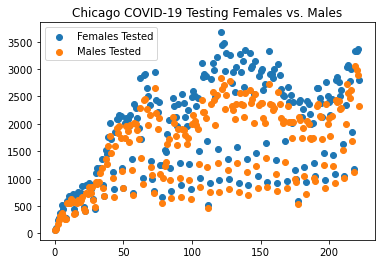

In [26]:
# Scatter Plot of Data
population1 = m_f_df['people_tested_female']
population2 = m_f_df['people_tested_male']
plt.title('Chicago COVID-19 Testing Females vs. Males')
plt.scatter(range(len(population1)), population1, label="Females Tested")
plt.scatter(range(len(population2)), population2, label="Males Tested")
plt.legend()
plt.show()

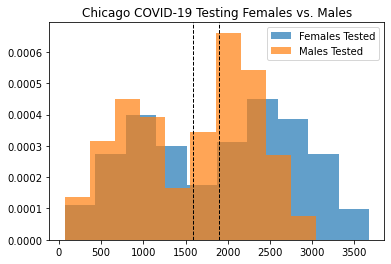

In [27]:
# Histogram Plot of Data
plt.title('Chicago COVID-19 Testing Females vs. Males')
plt.hist(population1, 10, density=True, alpha=0.7, label="Females Tested")
plt.hist(population2, 10, density=True, alpha=0.7, label="Males Tested")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()

In [13]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=3.943499897781807, pvalue=9.386706844678305e-05)

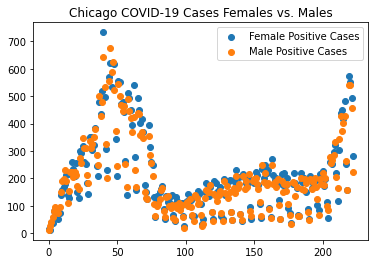

In [28]:
# Scatter Plot of Data
population3 = m_f_df['cases_female']
population4 = m_f_df['cases_male']
plt.title('Chicago COVID-19 Cases Females vs. Males')
plt.scatter(range(len(population3)), population3, label="Female Positive Cases")
plt.scatter(range(len(population4)), population4, label="Male Positive Cases")
plt.legend()
plt.show()

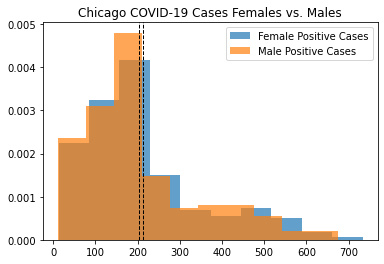

In [29]:
# Histogram Plot of Data
plt.title('Chicago COVID-19 Cases Females vs. Males')
plt.hist(population3, 10, density=True, alpha=0.7, label="Female Positive Cases")
plt.hist(population4, 10, density=True, alpha=0.7, label="Male Positive Cases")
plt.axvline(population3.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population4.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 
plt.show()

In [15]:
stats.ttest_ind(population3, population4, equal_var=False)

Ttest_indResult(statistic=0.6852679261124397, pvalue=0.49353293587107583)

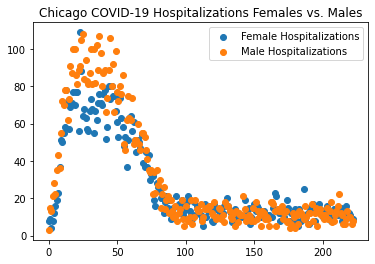

In [30]:
# Scatter Plot of Data
population5 = m_f_df['hospitalizations_female']
population6 = m_f_df['hospitalizations_male']
plt.title('Chicago COVID-19 Hospitalizations Females vs. Males')
plt.scatter(range(len(population5)), population5, label="Female Hospitalizations")
plt.scatter(range(len(population6)), population6, label="Male Hospitalizations")
plt.legend()
plt.show()

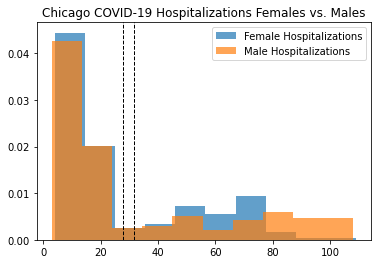

In [31]:
# Histogram Plot of Data
plt.title('Chicago COVID-19 Hospitalizations Females vs. Males')
plt.hist(population5, 10, density=True, alpha=0.7, label="Female Hospitalizations")
plt.hist(population6, 10, density=True, alpha=0.7, label="Male Hospitalizations")
plt.axvline(population5.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population6.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [17]:
stats.ttest_ind(population5, population6, equal_var=False)

Ttest_indResult(statistic=-1.505778311832064, pvalue=0.13288078079778678)

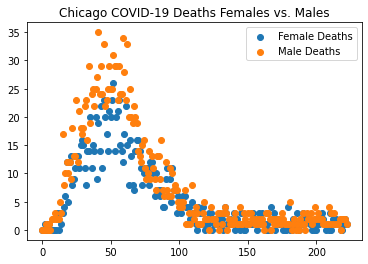

In [32]:
# Scatter Plot of Data
population7 = m_f_df['deaths_female']
population8 = m_f_df['deaths_male']
plt.title('Chicago COVID-19 Deaths Females vs. Males')
plt.scatter(range(len(population7)), population7, label="Female Deaths")
plt.scatter(range(len(population8)), population8, label="Male Deaths")
plt.legend()
plt.show()

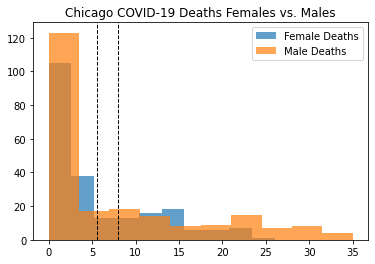

In [33]:
# Histogram Plot of Data
plt.title('Chicago COVID-19 Deaths Females vs. Males')
plt.hist(population7, 10, density=False, alpha=0.7, label="Female Deaths")
plt.hist(population8, 10, density=False, alpha=0.7, label="Male Deaths")
plt.axvline(population7.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population8.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [19]:
stats.ttest_ind(population7, population8, equal_var=False)

Ttest_indResult(statistic=-3.164047750771232, pvalue=0.0016772333470392977)